In [1]:
from Fotomics import LogScaler, FftTransformer
from FeaturePixelMapper import FeaturePixelMapper
from CoordInspector import CoordInspector

import pandas as pd
import csv 
import numpy as np 
from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df = pd.read_csv('./deng-reads-RawCount-modefied.csv',header=None)

C:\Users\luo\AppData\Local\Temp\ipykernel_42628\939468243.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,2

In [3]:
df.shape

(21298, 269)

In [4]:
def shuffle_data(x):
    
    # save header
    tmp_head = x[0]

    #remove header 
    x = x[1:]

    # shuffle by row 
    np.random.shuffle(x)

    #stack header
    x = np.vstack((tmp_head,x))

    # shuffle by column after T transformation 
    x = x.T 

    tmp_head = x[0]
    x = x[1:]

    np.random.shuffle(x)

    x = np.vstack((tmp_head,x))

    return x

In [5]:

# data preprocessing and data split 

mt = df.to_numpy()
#mt = mt.T

#shuffle dataset by rows and cols
mt = shuffle_data(mt)

# get type for each sample 
mt_Y = mt.T[0][1:]

mt1 = mt[:,1:]
mt_X = mt1[1:]
mt_X = mt_X.astype('float64')


unique_classes = np.unique(mt_Y)

# split data to train and test 
x_train, x_test, y_train, y_test = train_test_split(
    mt_X, mt_Y, test_size=0.2,stratify=mt_Y, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(unique_classes)
print(len(unique_classes))

(214, 21297) (54, 21297) (214,) (54,)
['16cell' '2cell' '4cell' '8cell' 'blast' 'zygote']
6


In [ ]:

# Normalize data using LogScaler
ln = LogScaler()

x_train_norm = ln.fit_transform(x_train)
x_test_norm = ln.transform(x_test)

d:\CodeOfStudy\COMP5703\Code\Fotomics-RGB\Fotomics.py:135: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_new[:, 0], x_new[:, 1], s=1,


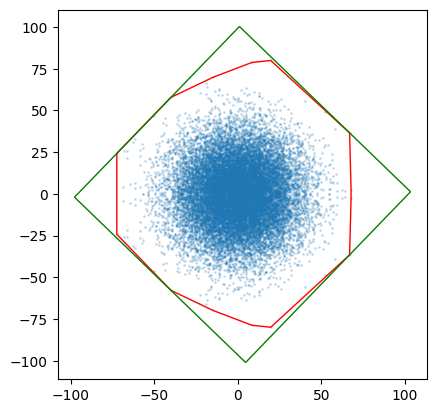

In [7]:
fft = FftTransformer(pixels=128)
fft_fit = fft.fit(x_train_norm, plot=True)



In [14]:
coords = fft.coords()
coords_df = pd.DataFrame(coords)
coords_df.head()

,0,1
0,64,65
1,61,59
2,37,46
3,50,56
4,74,68


### The X and Y coordinates of the images corresponding to 21,297 features share a single coordinate for all samples because the values are calculated based on all samples

In [32]:
coords_df.shape

(21297, 2)

### Intensity of basic Fotomics output points

In [16]:
x_train_img_identity = fft.transform(x_train_norm)
x_train_img_identity.shape

(214, 128, 128, 3)

In [17]:
x_test_img_identity = fft.transform(x_test_norm)
x_test_img_identity.shape


(54, 128, 128, 3)

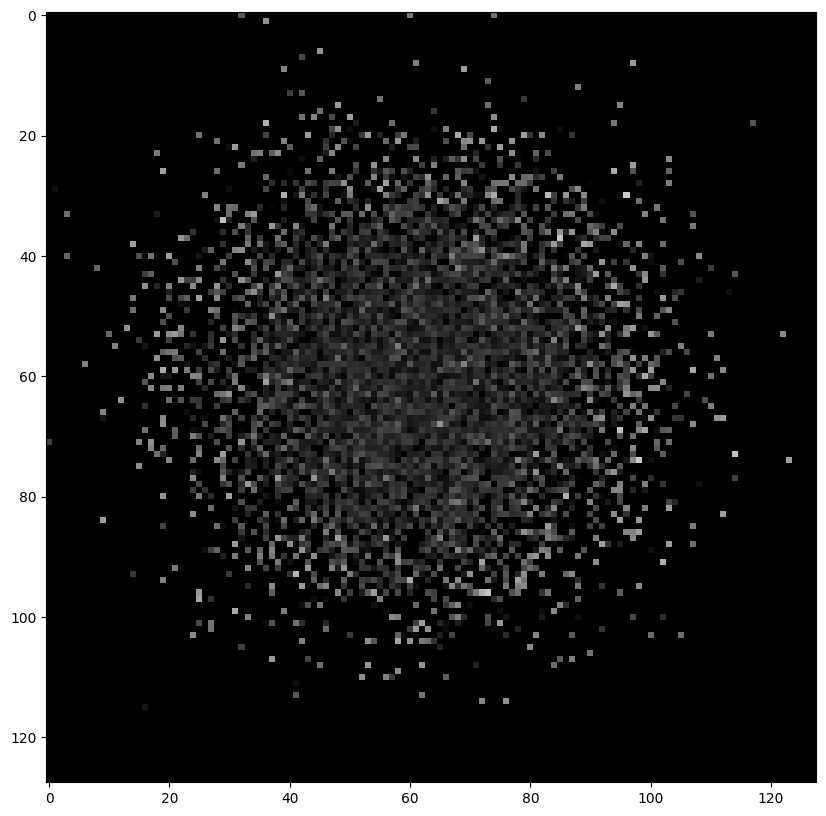

In [68]:
# plot 
plt.figure(figsize=(10, 10))
plt.imshow(x_train_img_identity[0], cmap='gray')

### There is a DataFrame that stores information about Feature categories, corresponding to which category each Feature belongs to

In [ ]:
# Create a dataset with 21297 features and 10 classes, resulting in a 21297x1 dataset
classes = pd.DataFrame()
for i in range(0, 21297):
    # Randomly add a number between 0 and 9
    classe = pd.DataFrame(np.random.randint(0, 3, size=(1, 1)))
    # Concatenate horizontally
    classes = pd.concat([classes, classe], axis=1)
# Convert to a numpy array
classes = classes.to_numpy()
classes.shape

(1, 21297)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pixels = 128

unique_classes = np.unique(classes)
n_classes = len(unique_classes)
colors = sns.color_palette("hsv", n_classes)

print(colors)


[(0.5176455764691059, 1.0, 0.0), (0.0, 1.0, 0.9647031631761764), (0.44705736433677606, 0.0, 1.0)]


In [73]:
colors

[(0.5176455764691059, 1.0, 0.0),
 (0.0, 1.0, 0.9647031631761764),
 (0.44705736433677606, 0.0, 1.0)]

In [ ]:
def RGB_transform(colors, Classes, coords_df, pixels, plot=False):
    img_coords = pd.DataFrame(np.vstack((
        coords_df.T,
        Classes
    )).T)
    
    # Add three RGB values based on the class value in img_coords
    # Iterate through each row and add RGB values
    RGB_df = pd.DataFrame(np.zeros((img_coords.shape[0], 3)), columns=['R', 'G', 'B'])
    for i in range(len(img_coords)):
        # Get the class value of the current row
        class_value = img_coords.iloc[i, -1]
        
        # Get the corresponding color based on the class value
        color = colors[int(class_value)]
        # Add the color values to RGB_df
        RGB_df.iloc[i] = color

    # Concatenate RGB_df with img_coords
    img_coords = pd.concat([img_coords, RGB_df], axis=1)
    img_coords.columns = ['X', 'Y', 'Class', 'R', 'G', 'B']

    img_coords_new = img_coords.copy()
    img_coords_new = img_coords_new.drop(columns=['Class'])

    # Group by X and Y, and take the average for identical values
    img_coords_new = img_coords_new.groupby(['X', 'Y']).mean().reset_index()

    # Initialize a blank RGB image
    img = np.zeros((pixels, pixels, 3), dtype=np.float32)
    # Iterate through img_coords_new and fill in the RGB values in the image
    for i in range(len(img_coords_new)):
        x = int(img_coords_new.iloc[i, 0])
        y = int(img_coords_new.iloc[i, 1])
        r = img_coords_new.iloc[i, 2]
        g = img_coords_new.iloc[i, 3]
        b = img_coords_new.iloc[i, 4]
        
        # Fill in the RGB values
        img[x, y] = [r, g, b]

    if plot == True:
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    return img

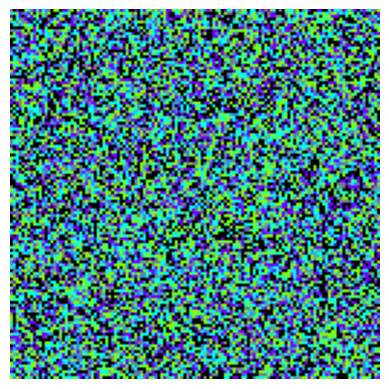

In [75]:
RGB_image = RGB_transform(colors, classes, coords_df, pixels,plot=True)

In [76]:
RGB_image.shape

(128, 128, 3)

(214, 128, 128, 3)


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

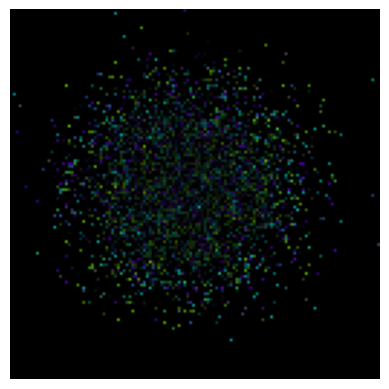

In [ ]:
import numpy as np

def RGB_identity_transform(RGB_image, img_identity):
    """
    Multiply each pixel's RGB values in RGB_image element-wise with the corresponding pixel in img_identity.
    
    Parameters:
    - RGB_image: shape (128, 128, 3)
    - img_identity: shape (54, 128, 128, 3)
    
    Returns:
    - transformed_imgs: shape (54, 128, 128, 3)
    """
    # Ensure dimensions match for broadcasting and perform element-wise multiplication
    transformed_imgs = img_identity * RGB_image[None, :, :, :]
    return transformed_imgs


transformed_imgs = RGB_identity_transform(RGB_image, x_train_img_identity)

print(transformed_imgs.shape)
# Output: (54, 128, 128, 3)

# Visualize one of the images
plt.imshow(transformed_imgs[1])
plt.axis('off')